# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
import datetime

# Import API key
from api_keys import weather_api_key

In [ ]:
#pip install citipy


In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

618

In [ ]:
# Cities_df=pd.DataFrame({"City Name":cities})

# Cities_df["Id"]=""
# Cities_df["Country"]=""
# Cities_df["Temp"]=""
# Cities_df["Humidity"]=""
# Cities_df.head()




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# for index,row in Cities_df.iterrows():
#     url = "http://api.openweathermap.org/data/2.5/weather?"
# # Build query URL
#     query_url = url + "appid=" + weather_api_key + "&q=" + row["City Name"]
#     print(query_url)
#     CityName=row["City Name"]
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()
#     weather_json=json.dumps(weather_json,indent=4)
#     print(weather_json)
    
#     try:
        
#         Cities_df.loc[index,"Id"]=weather_json["id"]
#         Cities_df.loc[index,"Country"]=weather_json["sys"]["country"] 
#         Cities_df.loc[index,"Temp"]=weather_json["main"]["temp"]
#         Cities_df.loc[index,"Humidity"]=weather_json["main"]["humidity"]
#         print("City Number:{},City Name:{} ".format(weather_json["id"],CityName))
              
#     except (KeyError,IndexError):
#          print("Info Not available...skipping")

     
        

In [4]:
ID=[]
Country=[]
MaxTemp=[]
Humidity=[]
lat=[]
lng=[]
Cloudiness=[]
Wind_Speed=[]
CityName=[]
Date=[]

units="Imperial"

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
# # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
     
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    weather_json=json.dumps(weather_data,indent=4,sort_keys=True)
    
    
    
    try:
        
        ID.append(weather_data["id"])
        CityName.append(weather_data["name"])
        Country.append(weather_data["sys"]["country"])
        Date.append(weather_data["dt"])
        MaxTemp.append(weather_data["main"]["temp_max"])
        Humidity.append(weather_data["main"]["humidity"])
        Cloudiness.append(weather_data["clouds"]["all"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        Wind_Speed.append(weather_data["wind"]["speed"])
        
        print("City Number:{},City Name:{} ".format(weather_data["id"],city))
              
    except (KeyError,IndexError):
       print("Info Not available...skipping")

    
    

City Number:5983720,City Name:iqaluit 
Info Not available...skipping
City Number:467120,City Name:yershov 
City Number:2123814,City Name:leningradskiy 
City Number:3386213,City Name:touros 
City Number:6185377,City Name:yellowknife 
City Number:589796,City Name:orissaare 
City Number:3874787,City Name:punta arenas 
City Number:5848280,City Name:kapaa 
City Number:4020109,City Name:atuona 
City Number:3146487,City Name:raudeberg 
City Number:5106841,City Name:albany 
City Number:3997017,City Name:luis moya 
Info Not available...skipping
City Number:3418910,City Name:upernavik 
City Number:4032243,City Name:vaini 
City Number:2129376,City Name:kushiro 
City Number:2155415,City Name:new norfolk 
City Number:2208248,City Name:kaitangata 
City Number:964432,City Name:port alfred 
City Number:1651810,City Name:airai 
City Number:3663516,City Name:mancio lima 
City Number:3466704,City Name:castro 
City Number:3870243,City Name:taltal 
City Number:3374333,City Name:praya 
City Number:556268,Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
output_file="city_data.csv"

FormattedDate=[]
fields=["ID","City Name","Country","Date","MaxTemp","Humidity","lat","lng","Cloudiness","Wind_Speed","Formatted Date"]
for item in Date:
    FormattedDate.append(datetime.date.fromtimestamp(item))
   # City_data_df["Formatted Date"]=Date[item]
#City_data_df.head()

#change the list of column items  to rows to write to csv
rows=zip(ID,CityName,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,FormattedDate,)
with open(output_file,'w',encoding='UTF-8') as csvfile:
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    for row in rows:
        csvwriter.writerow(row) 

    

In [6]:
City_data_df=pd.read_csv('city_data.csv', sep = ',')
City_data_df.head()

,ID,City Name,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,Formatted Date
0,5983720,Iqaluit,CA,1595473742,48.20,87,63.75,-68.51,90,8.05,2020-07-22
1,467120,Yershov,RU,1595473742,67.77,69,51.35,48.28,0,5.93,2020-07-22
2,2123814,Leningradskiy,RU,1595473743,64.11,38,69.38,178.42,100,7.96,2020-07-22
3,3386213,Touros,BR,1595473743,75.20,78,-5.20,-35.46,75,9.17,2020-07-22
4,6185377,Yellowknife,CA,1595473743,66.00,100,62.46,-114.35,75,6.93,2020-07-22


In [9]:
City_data_df.info()
#To check if there are duplicates for the cities.
a=City_data_df["City Name"].unique()
len(a)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              573 non-null    int64  
 1   City Name       573 non-null    object 
 2   Country         567 non-null    object 
 3   Date            573 non-null    int64  
 4   MaxTemp         573 non-null    float64
 5   Humidity        573 non-null    int64  
 6   lat             573 non-null    float64
 7   lng             573 non-null    float64
 8   Cloudiness      573 non-null    int64  
 9   Wind_Speed      573 non-null    float64
 10  Formatted Date  573 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 49.4+ KB


572

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#locate all rows with humidy>0
new_df=City_data_df.loc[City_data_df["Humidity"]> 100]
new_df
#No Cities with humidty >100
#drop rows wherein any of the column values are empty
clean_city_data_df=City_data_df.dropna(axis=0,how='any',inplace=False)
clean_city_data_df



,ID,City Name,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,Formatted Date
0,5983720,Iqaluit,CA,1595473742,48.20,87,63.75,-68.51,90,8.05,2020-07-22
1,467120,Yershov,RU,1595473742,67.77,69,51.35,48.28,0,5.93,2020-07-22
2,2123814,Leningradskiy,RU,1595473743,64.11,38,69.38,178.42,100,7.96,2020-07-22
3,3386213,Touros,BR,1595473743,75.20,78,-5.20,-35.46,75,9.17,2020-07-22
4,6185377,Yellowknife,CA,1595473743,66.00,100,62.46,-114.35,75,6.93,2020-07-22
...,...,...,...,...,...,...,...,...,...,...,...
568,2413419,Gunjur,GM,1595473818,78.80,94,13.20,-16.73,40,4.70,2020-07-22
569,3372472,Vila Franca do Campo,PT,1595473818,60.80,82,37.72,-25.43,20,4.70,2020-07-22
570,505820,Povenets,RU,1595473818,56.48,92,62.85,34.83,99,14.99,2020-07-22
571,2996268,Manche,FR,1595473818,50.00,87,49.00,-1.17,88,2.35,2020-07-22


In [ ]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysing the relationship between Temperature and Latitude


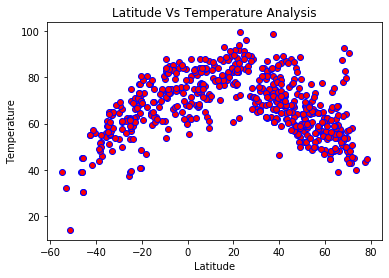

In [12]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["MaxTemp"],edgecolors="b",facecolor="r")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs Temperature Analysis")
plt.savefig("Output_plots/LatvsTemp.png")
print("Analysing the relationship between Temperature and Latitude")


## Latitude vs. Humidity Plot

Analysing the relationship between Latitude and Humidity


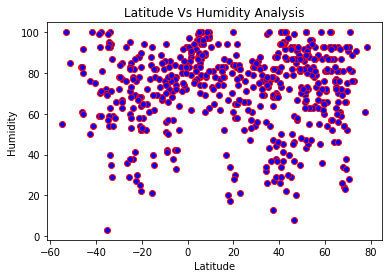

In [13]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["Humidity"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity Analysis")
plt.savefig("Output_plots/LatvsHum.png")
print("Analysing the relationship between Latitude and Humidity")

## Latitude vs. Cloudiness Plot

Analysing the relationship between Latitude and Cloudiness


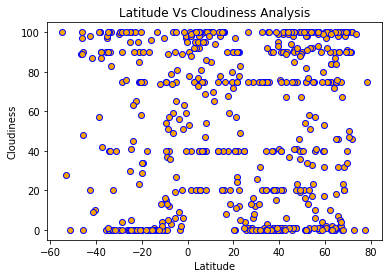

In [14]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["Cloudiness"],edgecolors="b",facecolor="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness Analysis")
plt.savefig("Output_plots/LatvsCloud.png")
print("Analysing the relationship between Latitude and Cloudiness")

## Latitude vs. Wind Speed Plot

Analysing the relationship between Latitude and Wind Speed


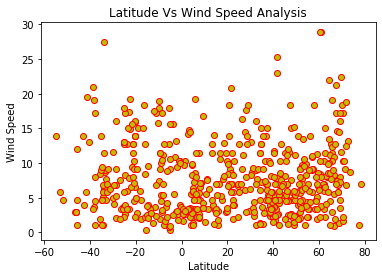

In [15]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["Wind_Speed"],edgecolors="r",facecolor="y")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed Analysis")
plt.savefig("Output_plots/LatvsWS.png")
print("Analysing the relationship between Latitude and Wind Speed")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [16]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=City_data_df.loc[City_data_df["lat"]>=0]
Southern_df=City_data_df.loc[City_data_df["lat"]<0]
Northern_df.head()


,ID,City Name,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,Formatted Date
0,5983720,Iqaluit,CA,1595473742,48.20,87,63.75,-68.51,90,8.05,2020-07-22
1,467120,Yershov,RU,1595473742,67.77,69,51.35,48.28,0,5.93,2020-07-22
2,2123814,Leningradskiy,RU,1595473743,64.11,38,69.38,178.42,100,7.96,2020-07-22
4,6185377,Yellowknife,CA,1595473743,66.00,100,62.46,-114.35,75,6.93,2020-07-22
5,589796,Orissaare,EE,1595473743,57.00,87,58.56,23.08,4,4.70,2020-07-22


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Northern Hemisphere:Regression between Latitude and Temperature


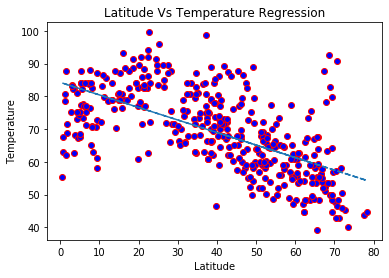

In [17]:
(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["MaxTemp"])
latitude =Northern_df .iloc[:,6]
Temperature=Northern_df.iloc[:,4]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["MaxTemp"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs Temperature Regression")
plt.plot(latitude,fit,"--")
print("Northern Hemisphere:Regression between Latitude and Temperature")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Southern Hemisphere:Regression between Latitude and Temp 


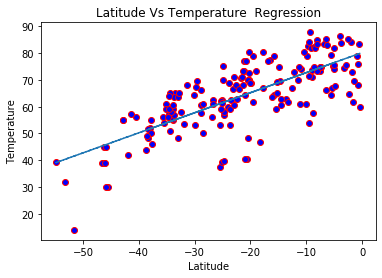

In [18]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["MaxTemp"])
latitude =Southern_df .iloc[:,6]
Temperature=Southern_df.iloc[:,4]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["MaxTemp"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs Temperature  Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemisphere:Regression between Latitude and Temp ")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Northern Hemispher:Regression between Latitude and Humidity 


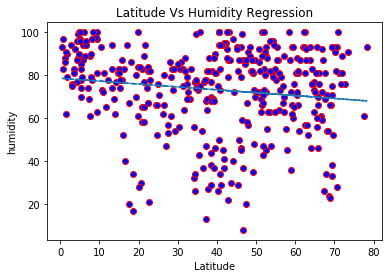

In [19]:
(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["Humidity"])
latitude =Northern_df .iloc[:,6]
Humidity=Northern_df.iloc[:,5]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["Humidity"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title("Latitude Vs Humidity Regression")
plt.plot(latitude,fit,"--")
print("Northern Hemispher:Regression between Latitude and Humidity ")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Southern Hemispher:Regression between Latitude and Humidity 


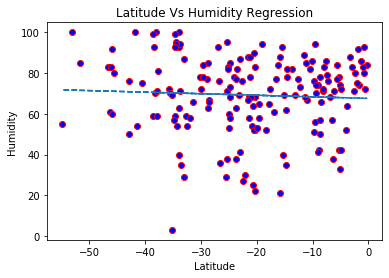

In [20]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["Humidity"])
latitude =Southern_df .iloc[:,6]
Humidity=Southern_df.iloc[:,5]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["Humidity"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemispher:Regression between Latitude and Humidity ")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression between Latitude and 


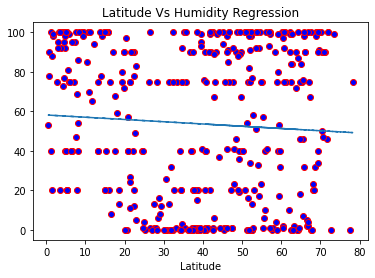

In [21]:
(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["Cloudiness"])
latitude =Northern_df .iloc[:,6]
Temperature=Northern_df.iloc[:,8]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["Cloudiness"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("")
plt.title("Latitude Vs Humidity Regression")
plt.plot(latitude,fit,"--")
print("Regression between Latitude and ")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Southern Hemispher :Regression between Latitude and Cloudiness 


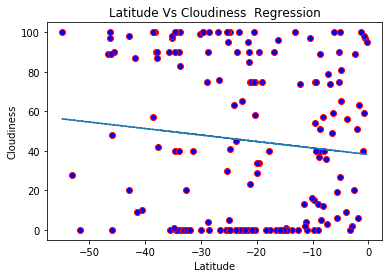

In [22]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["Cloudiness"])
latitude =Southern_df .iloc[:,6]
Clousiness=Southern_df.iloc[:,8]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["Cloudiness"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness  Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemispher :Regression between Latitude and Cloudiness ")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Northern Hemisphere:Regression between Latitude and Wind Speed 


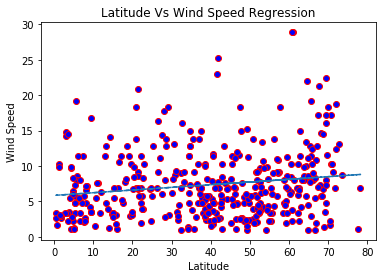

In [23]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["Wind_Speed"])
latitude =Northern_df .iloc[:,6]
WindSpeed=Northern_df.iloc[:,9]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["Wind_Speed"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed Regression")
plt.plot(latitude,fit,"--")
print("Northern Hemisphere:Regression between Latitude and Wind Speed ")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Southern Hemisphere:Regression between Latitude and Wind_Speed 


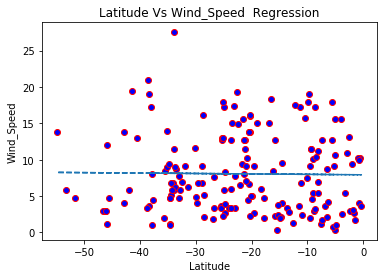

In [24]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["Wind_Speed"])
latitude =Southern_df .iloc[:,6]
WindSpeed=Southern_df.iloc[:,9]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["Wind_Speed"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitude Vs Wind_Speed  Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemisphere:Regression between Latitude and Wind_Speed ")
